<a href="https://colab.research.google.com/github/dbetteb/Design_Generation_GAN_Tensorflow/blob/main/TP5_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Génération de design mécanique par GAN

Ce TP a pour objectif d'illustrer les Réseaux Antagonistes Génératifs sur la génération de design mécaniques. 



## Les méthodes génératives

Les Réseaux Antagonistes Génératifs sont une approche récente introduite par Ian Goodfellow (dans [1] alors chercheur à l'Université de Montréal) tirant parti des caractéristiques à la fois des approches génératives et discriminatives afin de générer des entrées similaire à un ensemble d'apprentissage de références. En soi, il s'agit d'une approche générative non supervisée car le premier objectif des GAN est de générer des entrées (appelée $X$) non labellisée "proches" (dans un sens à préciser) de la distribution d'un ensemble de référence d'apprentissage.   

![](https://scx2.b-cdn.net/gfx/news/2018/5c1a01e78b2f1.jpg)


L'approche GAN a depuis son introduction en 2014 générée énormément d'intérêt de la part de la communauté machine learning et au-delà car elle repose sur une idée simple et permet a priori d'apprendre efficacement la distribution d'un ensemble d'apprentissage et de générer des exemples proches de ces derniers. Aussi, à la différence de nombreuses méthodes de machine learning aussi précises que les données d'entrées, les GAN offrent une sorte de créativité dans les exemples générés. L'exemple le plus marquant est l'utilisation de GAN sur des images (notamment de visages). Typiquement des GAN ont été utilisés par NVIDIA pour générer des visages à partir d'un ensemble de photos de visages existants et les visages générées ont atteint un niveau de réalisme impressionnant 

## Généralités sur les GAN

Comme le nom l'indique un GAN (ou Réseaux Antagonistes Génératifs) est globalement un modèle génératif. Son but est de générer des exemples $X$ proche d'une distribution de référence. Sa spécifité est à la fois de combiner $2$ modèles antagonistes, l'un génératif et l'autre discriminatif et de s'appuyer sur les récents succès de l'apprentissage profond. D'autres modèles génératifs ont récemment été développé, en exploitant les avancées de l'apprentissage profond, on trouve par exemple :

* les méthodes qui modèlisent explicitement les densités des ensembles d'apprentissage, soit de manière exacte (_Fully Visible Belief Nets_) ou de manière approchée (_Variational Autoencoder_ ou _Boltzmann machine_)
* les méthodes qui modélisent implicitement les densités et qui permettent d'échantillonner ces dernières, c'est le cas des approches de type chaînes de Markov (_Generative Stochastic Network_) et des approches directes dont font partie les GAN 

On retrouve donc, comme en inférence bayésienne (et en apprentissage par renforcement) la distinction très classique en machine learning entre méthodes à base de "modèle" (densité en l'occurence, type inférence variationnelle) et méthode "sans modèle" (à base d'échantillonnage de la densité qui n'est pas explicitement écrite type Monte Carlo Markov Chain). Par rapport aux autres modèles génératifs Goodfellow dans \cite{goodfellow2016nips} cite comme avantages des GAN les points suivants :

* possibilité de générer des échantillons en parallèle
* la fonction génératrice des GAN peut être très versatile (d'où aussi une grande difficulté pratique à l'entraîner correctement)
* pas d'hypothèse de Markov (pas de chaîne) 
* les GAN sont considérés comme asymptotiquement convergent
* enfin les résultats produis par les GAN sont substantiellement et subjectivement supérieurs aux autres modèles génératifs


Enfin, mentionnons que deux approches concurrentes génèrent beaucoup d'attention de la part de la communauté machine learning :

* Modèle de flow (*flow models*)
* Modèle autorégressifs (*autoregressive models*)

Les deux approches générent beaucoup d'attentes de la part de la communauté de recherche car ces méthodes pourraient pallier certains défauts des GAN (données mixtes notamment, entraînement plus facile), voir par exemple \cite{odena2019open}.

## Q1 : Exemple de GAN lab

A l'instar de Tensorflow Playground, [GANlab](https://poloclub.github.io/ganlab/) est un outil *in-browser*  permettant d'entraîner des architectures simples de GAN sur des data sets 2d et d'observer en live l'entraînement du GAN. 

- Jouer sur les taux d'apprentissage et observer les résultats. Que constatez-vous ?
- Que doit-on observer sur les métriques en cas de convergence ?

## Q2 : Import des données et des classes, cohérence de la base

On commence par monter le compte github suivant : 

In [35]:
!git clone https://github.com/dbetteb/Design_Generation_GAN_Tensorflow.git

Cloning into 'Design_Generation_GAN_Tensorflow'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


**Remarque** : Google Colab n'importe pas directement l'arborescence du git :
```
│   create_dataset.py 
│   Design_Generation_GAN_tensorflow.ipynb 
│   discriminator.py
│   discriminator_2.py
│   generator.py
│   generator_2.py
│   README.md
│   train.zip
│   train_dcgan.ipynb
```
mais crée un dossier temporaire `content` dans lequel on va bien retrouver le contenu du repo github `Design_Generation_GAN_Tensorflow` mais aussi un répertoire `sample_data` qui contient des données génériques pour servir d'exemples à l'import de données dans un notebook Colab. On va donc se positionner dans le bon répertoire.

In [25]:
%ls

create_dataset.py                       discriminator.py  README.md
Design_Generation_GAN_Tensorflow/       generator_2.py    train/
Design_Generation_GAN_tensorflow.ipynb  generator.py      train_dcgan.ipynb
discriminator_2.py                      __pycache__/      train.zip


On vérifie qu'on est bien dans le bon répertoire

In [26]:
%cd Design_Generation_GAN_Tensorflow/

/content/Design_Generation_GAN_Tensorflow/Design_Generation_GAN_Tensorflow


In [27]:
%ls

create_dataset.py                       discriminator.py  README.md
Design_Generation_GAN_tensorflow.ipynb  generator_2.py    train_dcgan.ipynb
discriminator_2.py                      generator.py      train.zip


On voit que le répertoire contient une archive `.zip` avec les exemples de design mécanique. On va donc dézipper cette archive directement (**remarque** : on peut utiliser les commandes Linux de base dans un notebook Colab en faisant précéder la commande par `!`).

In [28]:
!unzip train.zip

Archive:  train.zip
 extracting: train/design_2020-01-30 23_12_35_567__1.png  
  inflating: train/design_2020-01-30 23_12_44_398__1.png  
  inflating: train/design_2020-01-30 23_32_37_668__1.png  
 extracting: train/design_2020-01-30 23_34_26_822__1.png  
  inflating: train/design_2020-01-30 23_34_36_544__1.png  
 extracting: train/design_2020-01-30 23_38_50_916__1.png  
 extracting: train/design_2020-01-30 23_43_42_813__1.png  
 extracting: train/design_2020-01-30 23_54_48_218__1.png  
  inflating: train/design_2020-01-30 23_56_34_483__1.png  
  inflating: train/design_2020-01-31 08_08_51_971__1.png  
  inflating: train/design_2020-01-31 08_24_41_805__1.png  
  inflating: train/design_2020-01-31 08_30_40_089__1.png  
  inflating: train/design_2020-01-31 08_41_07_903__1.png  
 extracting: train/design_2020-01-31 08_47_59_988__1.png  
  inflating: train/design_2020-01-31 08_59_01_301__1.png  
 extracting: train/design_2020-01-31 09_03_40_167__1.png  
 extracting: train/design_2020-01-31

Par curiosité, on peut regarder ce que contient le répertoire `sample_data`.

In [29]:
%ls ../sample_data

ls: cannot access '../sample_data': No such file or directory


Il s'agit de jeu de données classiques du Machine Learning.

On importe ensuite les modules propres à ce TP (tensorflow) et des modules propres (créé pour ce TP) : `create_dataset`, `generator` et `discriminator`

In [30]:
import tensorflow as tf
import os
import time
from create_dataset import load_data
from generator import initialize_generator_weights, generator, generator_loss
from discriminator import initialize_discriminator_weights, discriminator, discriminator_loss
from IPython import display
import matplotlib.pyplot as plt

Avant d'importer les images, on va définir la batch size

In [31]:
BATCH_SIZE = 32

On importe les images à proprement parler

In [32]:
ROOT_PATH = "./"
train_data_directory = os.path.join(ROOT_PATH, "train/")

images_train = load_data(train_data_directory)
train_dataset = tf.data.Dataset.from_tensor_slices(images_train).shuffle(5000).batch(BATCH_SIZE)

On trace un exemple de design importé

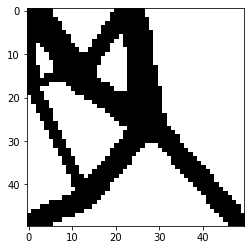

In [33]:
plt.imshow(images_train[512, :, :, 0], cmap='gray')


Comme on le constate une image (un design mécanique) consiste en des niveaux de gris de $50 x 50$. Un pixel à valeur de 1 représente le vide et la valeur 0 représente la matière. 

- Quelle est la taille de la base d'apprentissage (nombre d'exemples, channel, dimension...) ?
- Représenter quelques design par exemple en les superposant sur un plot 
- Le taux de matière est le ratio de pixels 0 sur le nombre de pixels, tracer l'histogramme de ce taux de matière
- Conclure sur la cohérence de la base d'apprentissage 

### Taille de la base

In [61]:
images_train.shape

(3885, 50, 50, 1)

### Quelques designs

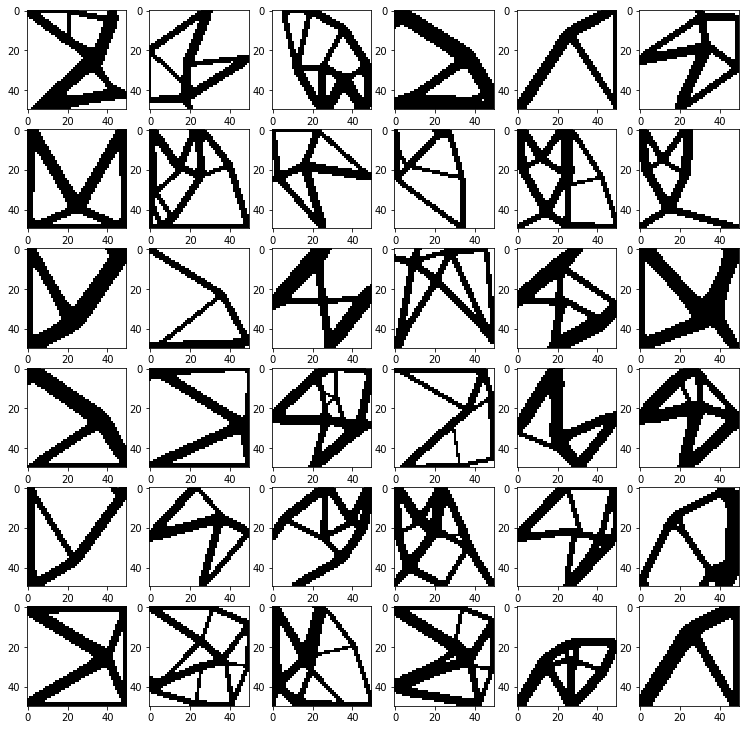

In [60]:
def gen_index(nmax):
  return np.random.randint(1,nmax)

plt.figure(figsize=[15,15])  # create a plot figure
nside = 6
# create the first of two panels and set current axis
for i in range(1,nside+1):
  for j in range(1,nside+1):
      plt.subplot(nside+1, nside+1, (nside+1)*(i-1)+j) # (rows, columns, panel number)
      plt.imshow(images_train[gen_index(3885), :, :, 0], cmap='gray')

### Dispersion taux de matière

On commence par créer une fonction qui calcule pour une image de taux

In [64]:
def MatterRate(image_index=1):
  return (2500.-np.sum(images_train[image_index, :, :, 0]))/2500.

In [69]:
Rates = []
for i in range(1,3885):
  Rates.append(MatterRate(i))

Text(0.5, 1.0, 'Dispersion du taux de matière')

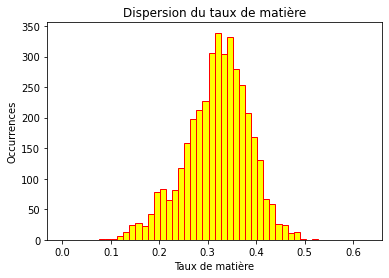

In [73]:
plt.hist(Rates, range = (0., 1.2*np.max(Rates)), bins = 50, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('Taux de matière')
plt.ylabel('Occurrences')
plt.title('Dispersion du taux de matière')

#### Conclusion sur la dispersion des données

La base comprend 3885 design mecaniques. Ces designs correspondent à des structures élancées et comprennent tous un certain nombre de barres assez fines. Néanmoins, certains design ont plus de matière que d'autres et les designs n'ont d'orientation propre (contrairement par exemple à la base MNIST où les chiffres ont une orientation donnée). Bien qu'on observe une distribution assez simple de la matière, on peut s'attendre à une grande diversité de design et donc à une relative complexité de la tâche de génération.

## Q3 : Initialisation des architectures et la dimension latente

- Que font les fonctions `initialize_weights_generator` et `initialize_weights_discriminator` et quelle est le rôle de la variable `nf` ?
- Quelles sont les architectures utilisées  ?
- Initialiser des architectures avec `nf=32` 
- Visualiser un exemple de génération 



### `initialize_weights` ?

Ces deux fonctions permettent d'initialiser tous les paramètres internes des deux architectures et de modifier la première couche convolutionnelle (résiduelle). En particulier, `nf` désigne le nombre de filtres (ou sorties) de la première couche convolutionnelle.

### Les architectures utilisées 

Il s'agit dans les deux cas (générateur et discriminateur) de couches convolutionnelles. Néanmoins, le générateur a pour sortie une image en partant d'une entrée de faible dimension (dimension latente). Donc à l'inverse d'un CNN classique les couches convolutionnelles augmente la taille des sorties de l'entrée de taille 100 jusqu'à une sortie de taille 50x50. 

### Initialiser les architectures 

In [80]:
weights_d, biases_d = initialize_discriminator_weights(nf = 32)
weights_g, biases_g = initialize_generator_weights(nf = 32)